In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
832,6.91,59.0,0
934,7.15,9.0,0
687,6.81,23.0,0
500,6.07,24.0,1
811,8.04,14.0,0


In [50]:
df.isnull().sum()
# we are all clear 

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_20812\2919623219.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_20812\2919623219.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


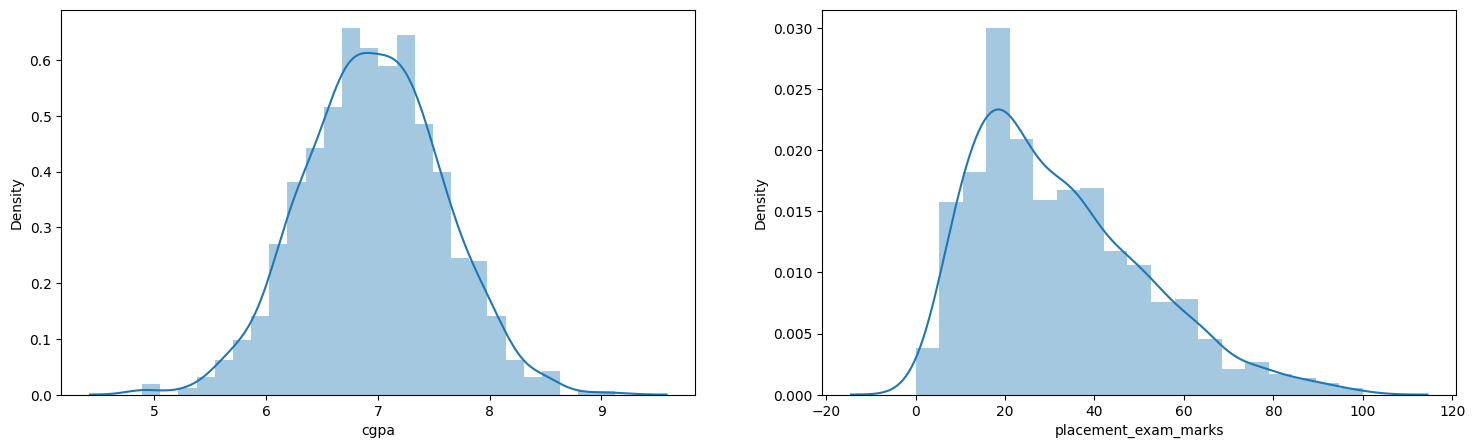

In [5]:
#lets plot a displot to see the data distrubution 
#fig  , (ax1 , ax2 ) = plt.subplots(nrows  = 1 , ncols = 2  , figsize = (12 , 5 ) ) 
plt.figure(figsize=(18,5))
plt.subplot(1,2,1) #last ko 1 index means leftpati 
sns.distplot(df['cgpa'])

plt.subplot(1,2,2) # last ko 2 means right pati 
sns.distplot(df['placement_exam_marks'])

plt.show()

In [6]:
#from this graph we get an idea that cgpa columns  is normally distrubuited and placement exam marks
#is right skwed 

In [7]:
#fruther 
print(df['cgpa'].skew().round(3) , "  :cpga skweness " ) 
print(df['placement_exam_marks'].skew().round(3) , " : placement_exam_marks skwness " )
#see cgpa is almoest normally distributed and place_men.... is skwed 

-0.015   :cpga skweness 
0.836  : placement_exam_marks skwness 


In [8]:
# it is easy to detect outliers but hard to find out what to do with outlesrs 
#there is two famous methods for decetecting the outliners 

### for normally distructution we use this formula 

#   if  x >   mean + 3 * standard deviation  
        # and  x < mean - 3* standard deviation 
    

    

In [9]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [10]:
higest_allowed = df['cgpa'].mean() + 3 * df['cgpa'].std() 

In [11]:
lowest_allowed = df['cgpa'].mean() -  3 * df['cgpa'].std()

In [12]:
lowest_allowed  , higest_allowed

(5.113546374602832, 8.808933625397168)

In [1]:
#methods for removing outliers are
# 1) Trimming  
   # 2) capping   
   # 3) missing values
   # 4) discretization 



In [14]:
#trimming 
# Trimming involves removing a fixed percentage of data from both the upper and lower ends of a datase

trimed_df = df[(df['cgpa' ] < higest_allowed ) & (df['cgpa'] > lowest_allowed)]

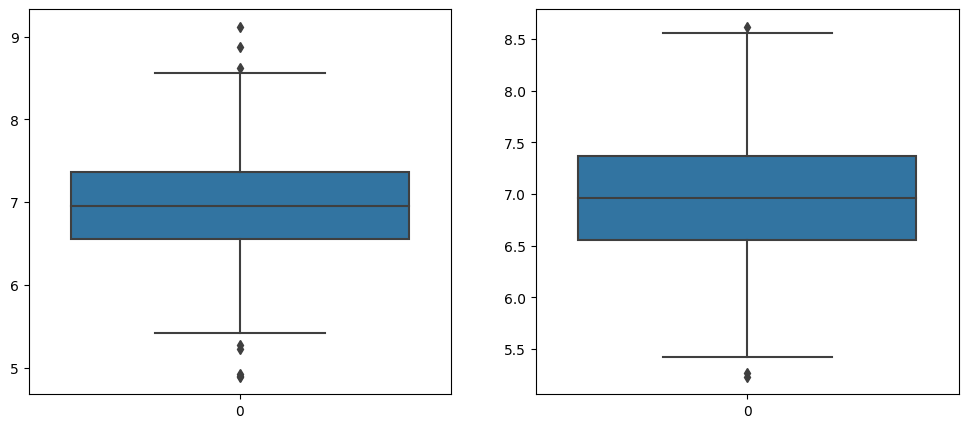

In [26]:
#check for outliners 
plt.figure(figsize = (12 , 5 ) )
plt.subplot( 1 , 2 , 1 ) 
sns.boxplot(df['cgpa'])



plt.subplot( 1 , 2 , 2 ) 
sns.boxplot(trimed_df['cgpa'])
plt.show()


In [47]:
df.shape

(1000, 3)

using capping 


In [43]:
df['cgpa'] = np.where(df['cgpa']  > higest_allowed  , 
                      higest_allowed  ,
                      np.where(df['cgpa']<lowest_allowed ,
                               lowest_allowed  ,
                               df['cgpa'] )
                     )

#syntax np.where( contidion , if true then exchange the value with this  , if false ......  , else ) 

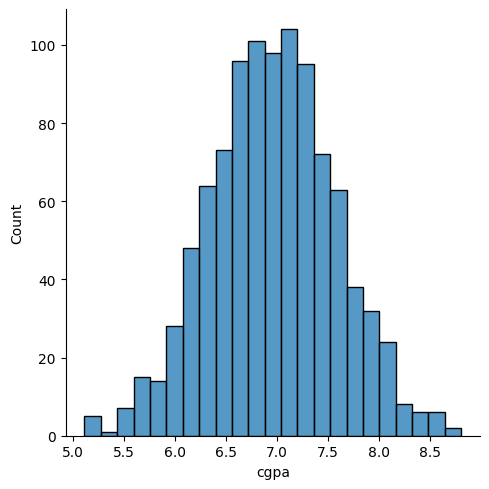

In [51]:
sns.displot(df['cgpa'])

In [48]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [53]:
df['cgpa'].skew()

-0.003704380991302917